# Insurance Claim Fraud Detection

# Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


# Independent Variables

1.	months_as_customer: Number of months of patronage

2.	age: the length of time a customer has lived or a thing has existed

3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer

4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance

5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period

6.	policy_csl: is basically Combined Single Limit

7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss

8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year

9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies

10.	insured_zip: It is the zip code where the insurance was made

11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive
	functions
13.	insured_education_level: This refers to the Level of education of the customer

14.	insured_occupation: This refers Occupation of the customer

15.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.

16.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or.     in a civil partnership
17.	capital-gains: This refers to profit accrued due to insurance premium

18.	capital-loss: This refers to the losses incurred due to insurance claims

19.	incident_date: This refers to the date which claims where made by customers

20.	incident_type: This refers to the type of claim/vehicle damage made by customer

21.	collision_type: This refers to the area of damage on the vehicle

22.	incident_severity: This refers to the extent/level of damage

23.	authorities_contacted: This refers to the government agencies that were contacted after damage

24.	incident_state: This refers to the state at which the accident happened

25.	incident_city: This refers to the city at which the accident happened

26.	1ncident_location: This refers to the location at which the accident happened

27.	incident_hour_of_the_day: The period of the day which accident took place

28.	number_of_vehicles_involved: This refers to number of vehicles involved the accident

29.	property_damage: This refers to whether property was damaged or not

30.	bodily_injuries: This refers to injuries sustained

31.	witnesses: This refers to the number of witnesses involved

32.	police_report_available: This refers to whether the report on damage was documented or not

33.	total_claim_amount: This refers to the financial implications involved in claims

34.	injury_claim: This refers to physical injuries sustained

35.	property_claim: This refers to property damages during incident

36.	vehicle_claim: This refers to property damages during incident

37.	auto_make: This refers to the make of the vehicle

38.	auto_model: This refers to the model of the vehicle

39.	auto_year: This refers to the year which the vehicle was manufactured

40.	_c39:

41.	fraud_reported


# Dataset Link-  

•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv

In [1]:
# importing necessory libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import  matplotlib.pyplot  as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report


In [2]:
# Extract the dataset from local system

df=pd.read_csv(r"D:\5.7.2024 BR\Excel Report\Data project\evaluation/Automobile_insurance_fraud.csv")


In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [4]:
# check the shape of the dataset

df.shape

(1000, 39)

In [5]:
# check the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# check the null values in the dataset

df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
1ncident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [7]:
# Check the column authorities_contacted unique values 

df['authorities_contacted'].unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

In [8]:
# fill the null values in that column using fillna method

df["authorities_contacted"]=df["authorities_contacted"].fillna(df["authorities_contacted"].mode()[0])

In [11]:
# after fill the null values and recheck the null values

df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
1ncident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [19]:
# check the unique values in the dataset columnwise

df.nunique().to_frame(" Number of unique value ")

,Number of unique value
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [21]:
# Seperating Numerical and Categorical columns

#Checking for Categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical column ", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical column ", numerical_col)

Categorical column  ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', '1ncident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical column  ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


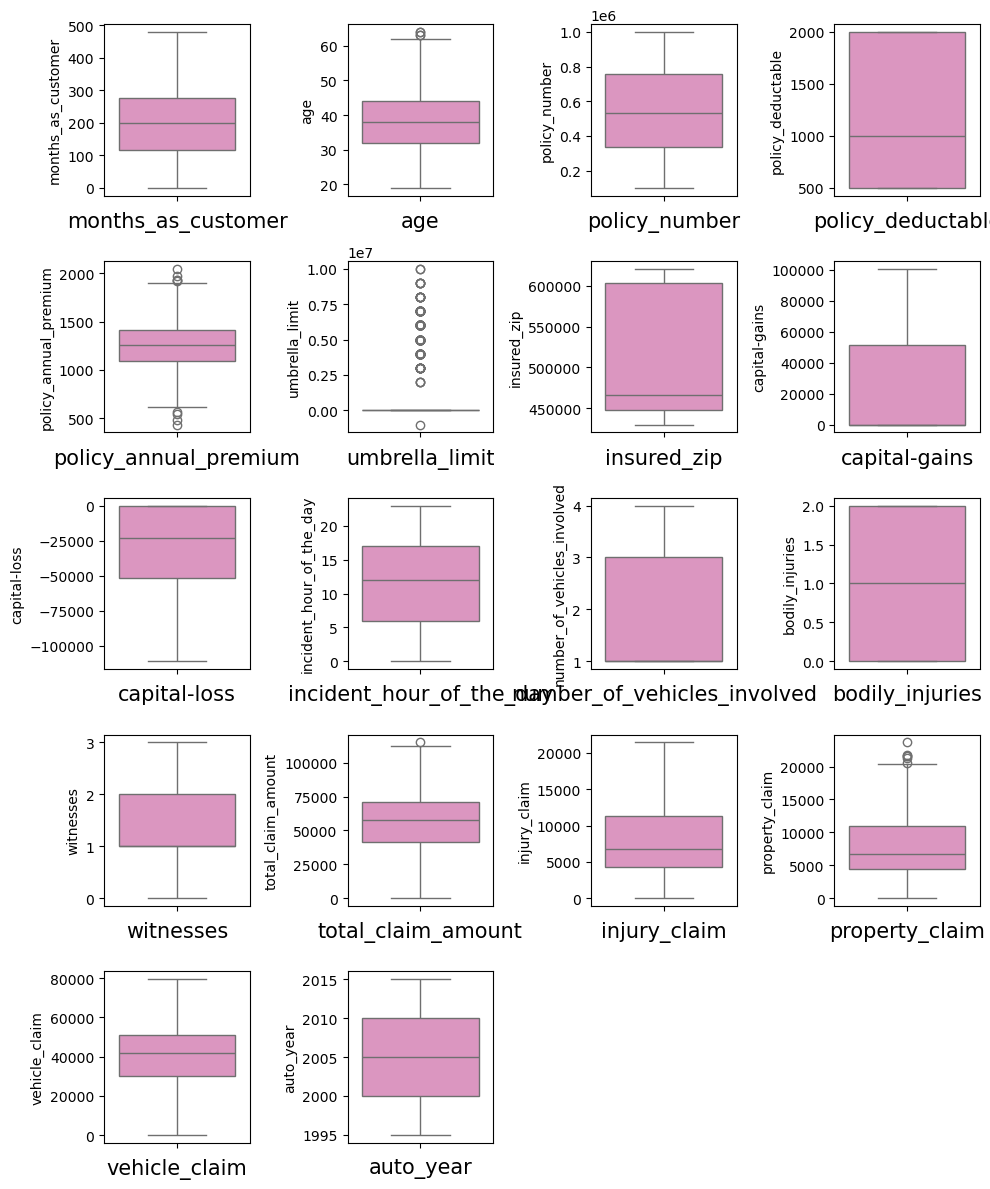

In [24]:
# let’s check the outliers by ploting  boxplot.
plt.figure(figsize = (10, 12),  facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber <=18:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber +=1
plt.tight_layout()
        

as per the above figure boxplot figure there is no outliers exist. But property_claim have some outliers.
We are not removing right now.

fraud_reported
N    753
Y    247
Name: count, dtype: int64


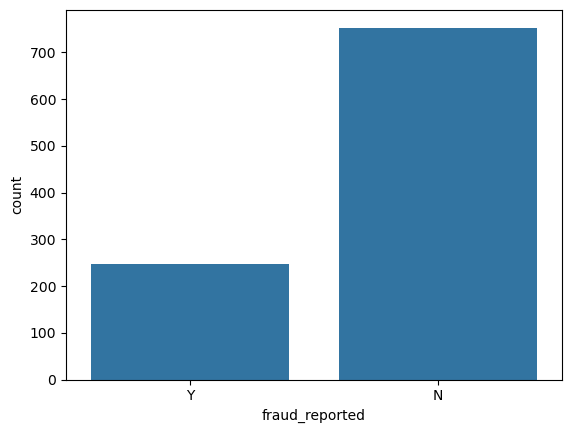

In [25]:
# check  Fruad using countplot
ax = sns.countplot(x='fraud_reported', data=df)
print(df['fraud_reported'].value_counts())



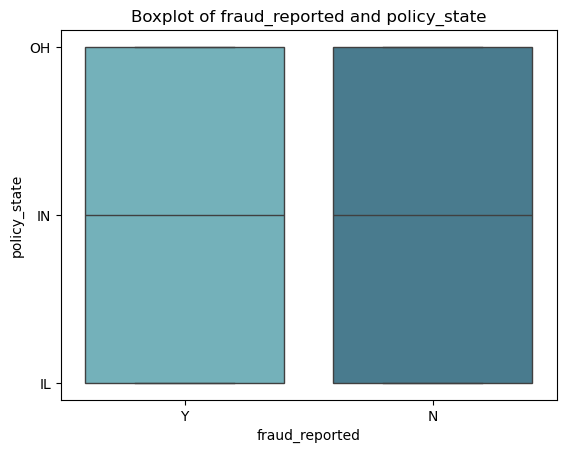

In [26]:
# check  policy state using countplot
ax = sns.countplot(x='policy_state', data=df)
print(df['policy_state'].value_counts())

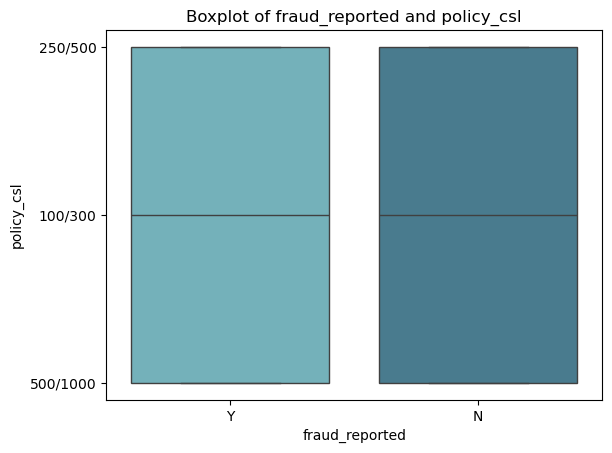

In [27]:
# check  policy csl using countplot
ax = sns.countplot(x='policy_csl', data=df)
print(df['policy_csl'].value_counts())

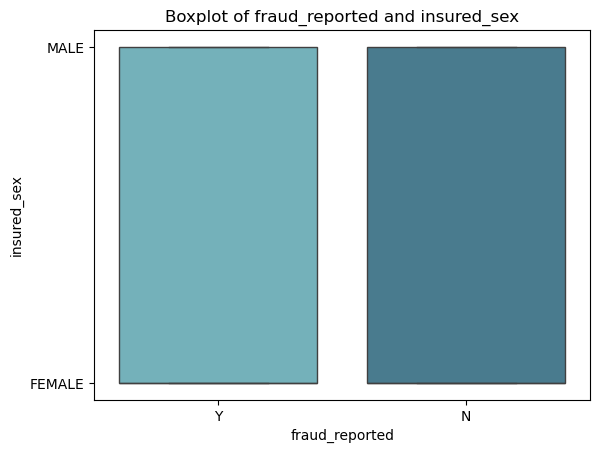

In [28]:
# check  insured_sex using countplot
ax = sns.countplot(x='insured_sex', data=df)
print(df['insured_sex'].value_counts())

insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64


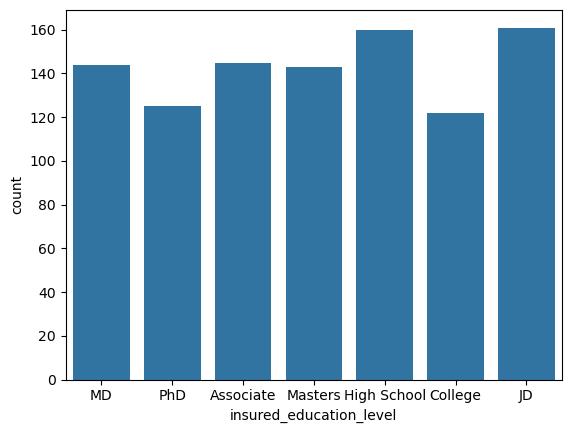

In [29]:
# check  insured_education_level using countplot
ax = sns.countplot(x='insured_education_level', data=df)
print(df['insured_education_level'].value_counts())

insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64


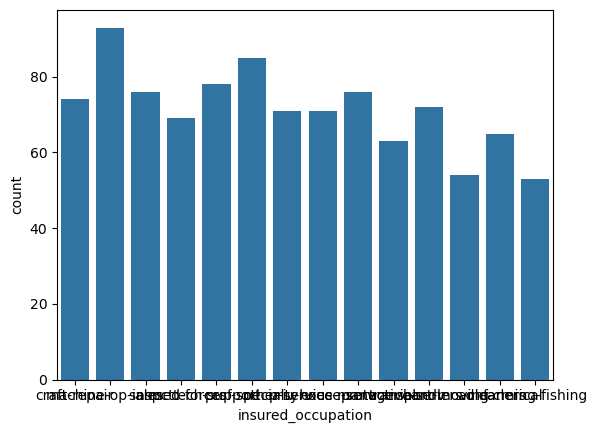

In [30]:
# check  insured_occupation using countplot
ax = sns.countplot(x='insured_occupation', data=df)
print(df['insured_occupation'].value_counts())

insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: count, dtype: int64


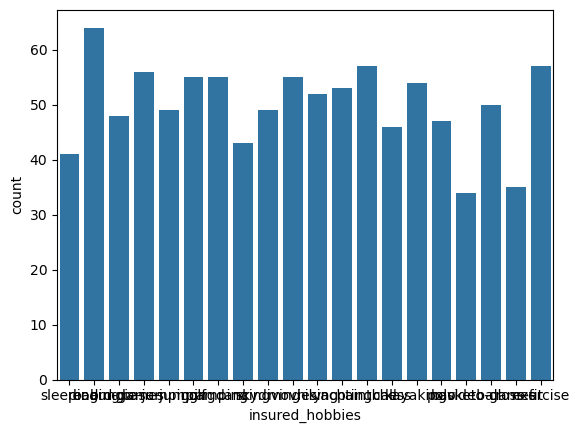

In [31]:
# check insured_hobbies using countplot
ax = sns.countplot(x='insured_hobbies', data=df)
print(df['insured_hobbies'].value_counts())

insured_relationship
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: count, dtype: int64


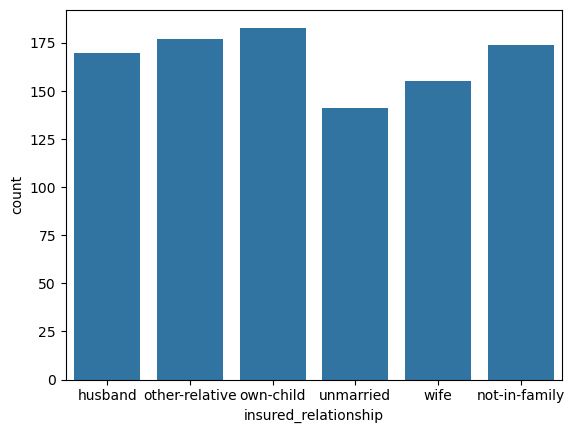

In [34]:
# check insured_relationship using countplot
ax = sns.countplot(x='insured_relationship', data=df)
print(df['insured_relationship'].value_counts())

incident_type
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: count, dtype: int64


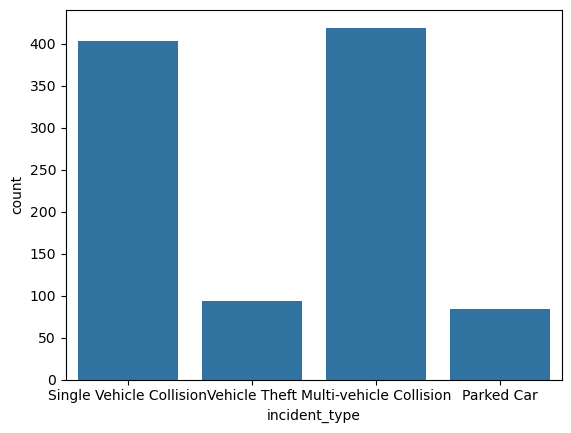

In [36]:
# check incident_type using countplot
ax = sns.countplot(x='incident_type', data=df)
print(df['incident_type'].value_counts())

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64


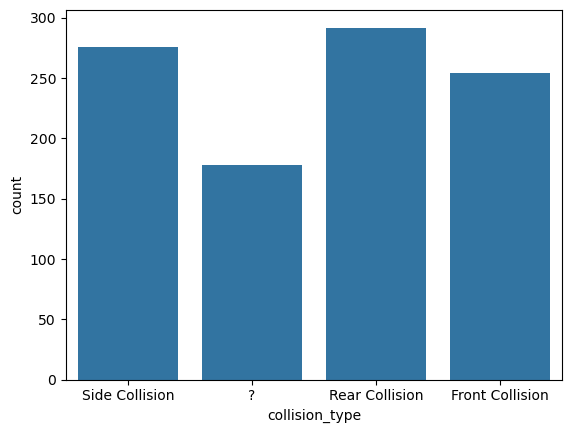

In [40]:
# check collision_type using countplot
ax = sns.countplot(x='collision_type', data=df)
print(df['collision_type'].value_counts())

i am identifying unwanted or miss informatio ? in collision_type column

incident_severity
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: count, dtype: int64


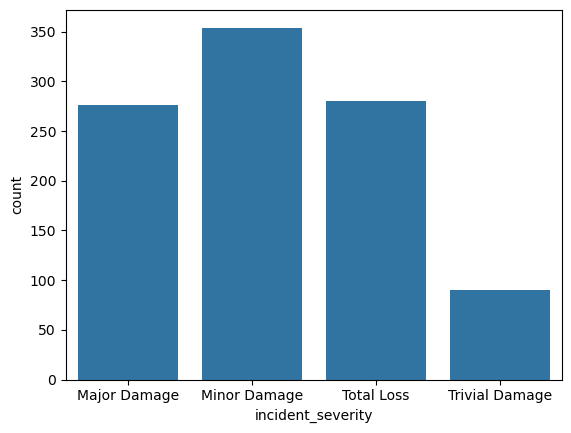

In [42]:
# check incident_severity using countplot
ax = sns.countplot(x='incident_severity', data=df)
print(df['incident_severity'].value_counts())

authorities_contacted
Police       383
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64


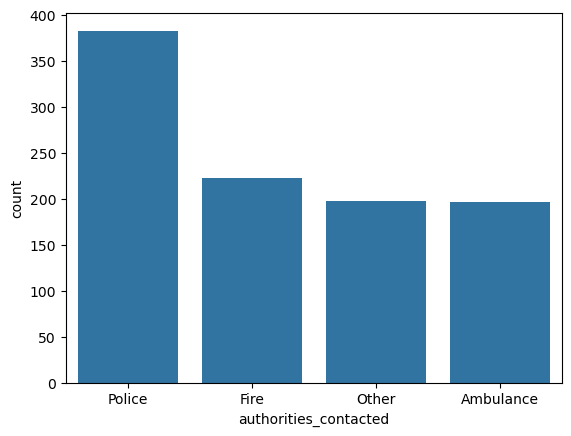

In [44]:
# check authorities_contacted using countplot
ax = sns.countplot(x='authorities_contacted', data=df)
print(df['authorities_contacted'].value_counts())

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64


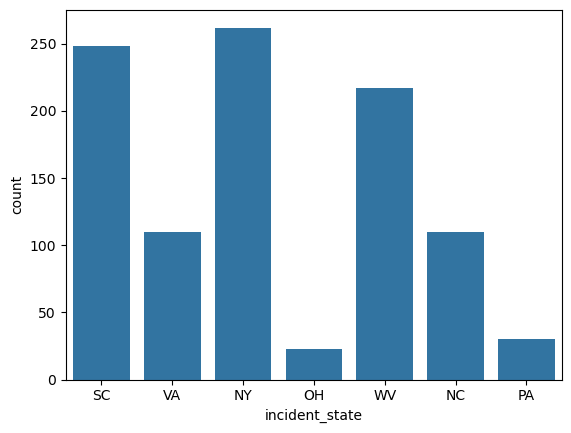

In [46]:
# check incident_state using countplot
ax = sns.countplot(x='incident_state', data=df)
print(df['incident_state'].value_counts())

incident_city
Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: count, dtype: int64


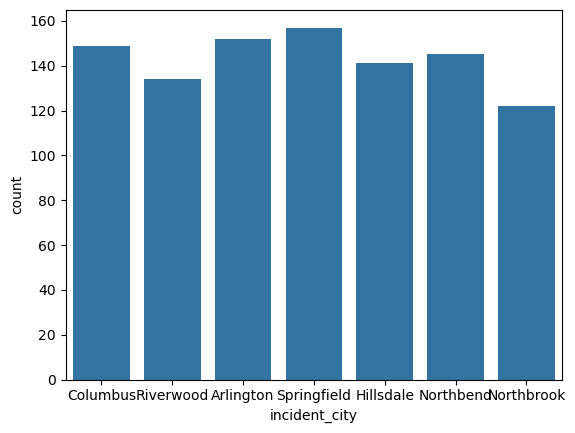

In [48]:
# check incident_city using countplot
ax = sns.countplot(x='incident_city', data=df)
print(df['incident_city'].value_counts())

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64


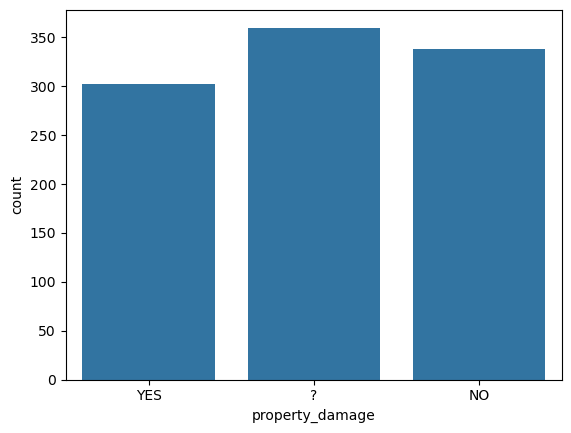

In [51]:
# check property_damage using countplot
ax = sns.countplot(x='property_damage', data=df)
print(df['property_damage'].value_counts())

I am find the miss informatiom ? in this column property_demage.

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64


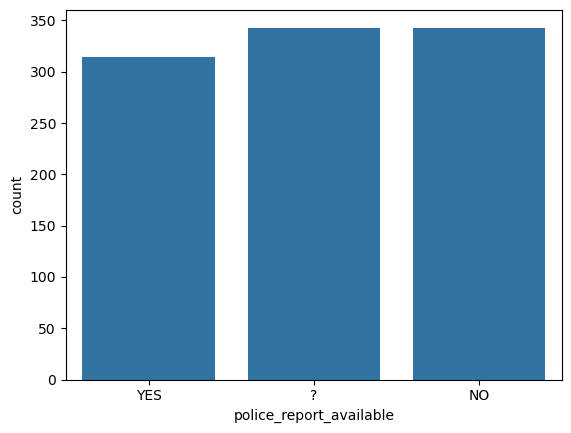

In [54]:
# check police_report_available using countplot
ax = sns.countplot(x='police_report_available', data=df)
print(df['police_report_available'].value_counts())

auto_make
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: count, dtype: int64


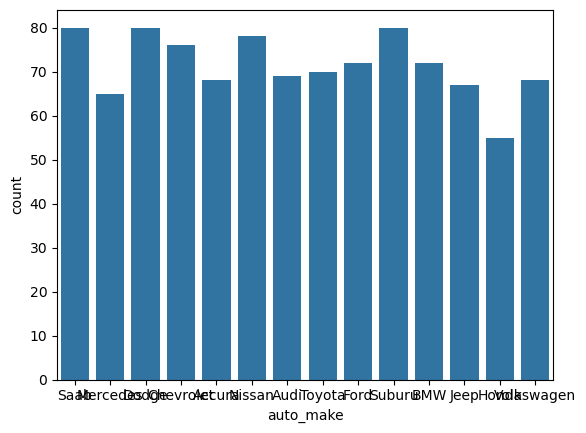

In [56]:
# check auto_make using countplot
ax = sns.countplot(x='auto_make', data=df)
print(df['auto_make'].value_counts())

auto_model
RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: count, dtype: int64


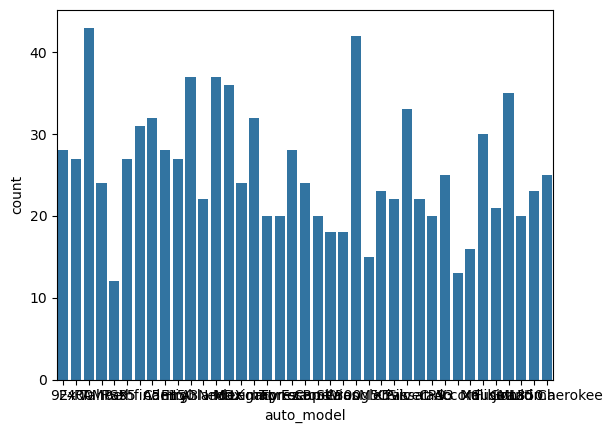

In [59]:
# check auto_model using countplot
ax = sns.countplot(x='auto_model', data=df)
print(df['auto_model'].value_counts())

In [61]:
# get the categorical column in a variable

categorical_cols = [feature for feature in df.columns if df[feature].dtype=='object']
df[categorical_cols].sample(5)

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,1ncident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
447,12-07-2013,IL,250/500,MALE,Associate,tech-support,exercise,wife,15-01-2015,Single Vehicle Collision,...,Minor Damage,Fire,NC,Riverwood,9369 Flute Hwy,YES,NO,Chevrolet,Malibu,N
743,29-03-1995,IN,500/1000,MALE,PhD,exec-managerial,hiking,husband,08-02-2015,Multi-vehicle Collision,...,Major Damage,Other,SC,Arlington,9103 MLK Lane,YES,YES,Toyota,Highlander,Y
415,07-09-2006,OH,500/1000,FEMALE,High School,machine-op-inspct,basketball,unmarried,11-01-2015,Single Vehicle Collision,...,Total Loss,Other,WV,Northbrook,1929 Britain Drive,NO,NO,Suburu,Legacy,N
132,18-10-2005,OH,100/300,FEMALE,Masters,tech-support,exercise,unmarried,22-02-2015,Multi-vehicle Collision,...,Major Damage,Ambulance,NC,Arlington,2808 Elm St,?,?,Nissan,Pathfinder,N
818,26-08-2000,IL,250/500,MALE,College,prof-specialty,paintball,wife,01-01-2015,Vehicle Theft,...,Trivial Damage,Police,WV,Northbend,2878 Britain Hwy,YES,?,Chevrolet,Malibu,N


In [63]:
# Remove the columns from the dataset

df = df.drop('policy_bind_date', axis=1)
df = df.drop('incident_date', axis=1) 

In [66]:
# Replace or deal ? with nan from all three columns like collision_type, property_damage and police_report_available

df.replace('?', np.nan, inplace=True)

In [68]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [70]:
# again Check the null values 

df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
1ncident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [72]:
# fill the nan with mode method because it's object data type

df["collision_type"]=df["collision_type"].fillna(df["collision_type"].mode()[0])
df["property_damage"]=df["property_damage"].fillna(df["property_damage"].mode()[0])
df["police_report_available"]=df["police_report_available"].fillna(df["police_report_available"].mode()[0])

In [74]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
1ncident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

collision_type
Rear Collision     470
Side Collision     276
Front Collision    254
Name: count, dtype: int64


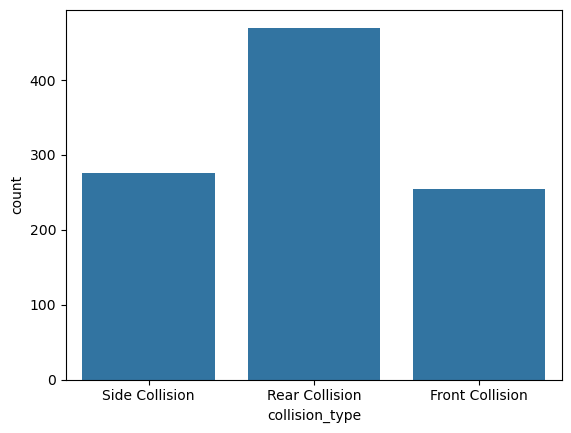

In [76]:
# recheck collision_type using countplot
ax = sns.countplot(x='collision_type', data=df)
print(df['collision_type'].value_counts())

property_damage
NO     698
YES    302
Name: count, dtype: int64


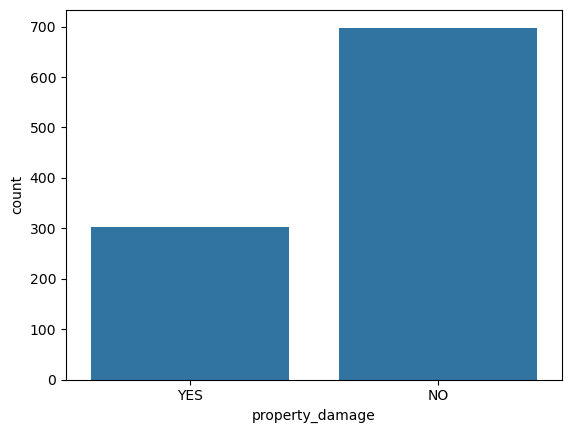

In [78]:
# recheck property_damage using countplot
ax = sns.countplot(x='property_damage', data=df)
print(df['property_damage'].value_counts())

police_report_available
NO     686
YES    314
Name: count, dtype: int64


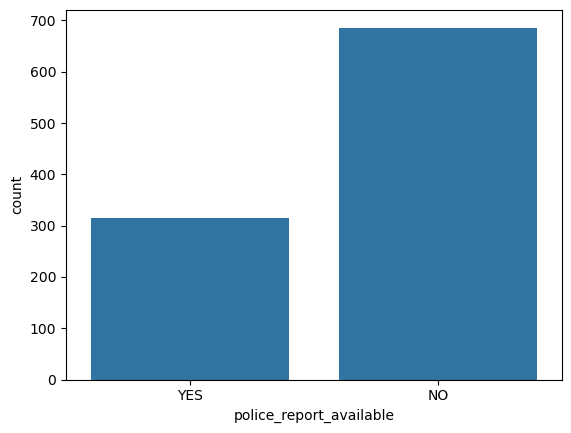

In [80]:
# recheck police_report_available using countplot
ax = sns.countplot(x='police_report_available', data=df)
print(df['police_report_available'].value_counts())

In [82]:
# Remove the 1ncident_location coulmn from the dataset

df = df.drop('1ncident_location', axis=1) 

In [84]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [86]:
# Encoding categorical columns using ordinal encoder columns like policy_state, policy_csl ,insured_sex etc.
from sklearn.preprocessing import OrdinalEncoderent
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2.0,1.0,1000,1406.91,0,466132,1.0,...,2,1.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,1.0,1.0,2000,1197.22,5000000,468176,1.0,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,2.0,0.0,2000,1413.14,5000000,430632,0.0,...,3,0.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,0.0,1.0,2000,1415.74,6000000,608117,0.0,...,2,0.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,0.0,2.0,1000,1583.91,6000000,610706,1.0,...,1,0.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2.0,2.0,1000,1310.80,0,431289,0.0,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,0.0,0.0,1000,1436.79,0,608177,0.0,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,2.0,1.0,500,1383.49,3000000,442797,0.0,...,3,1.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,0.0,2.0,2000,1356.92,5000000,441714,1.0,...,1,1.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   float64
 4   policy_csl                   1000 non-null   float64
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   float64
 10  insured_education_level      1000 non-null   float64
 11  insured_occupation           1000 non-null   float64
 12  insured_hobbies              1000 non-null   float64
 13  insured_relationshi

In [90]:
# check the statistic of the data set using describe method

df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


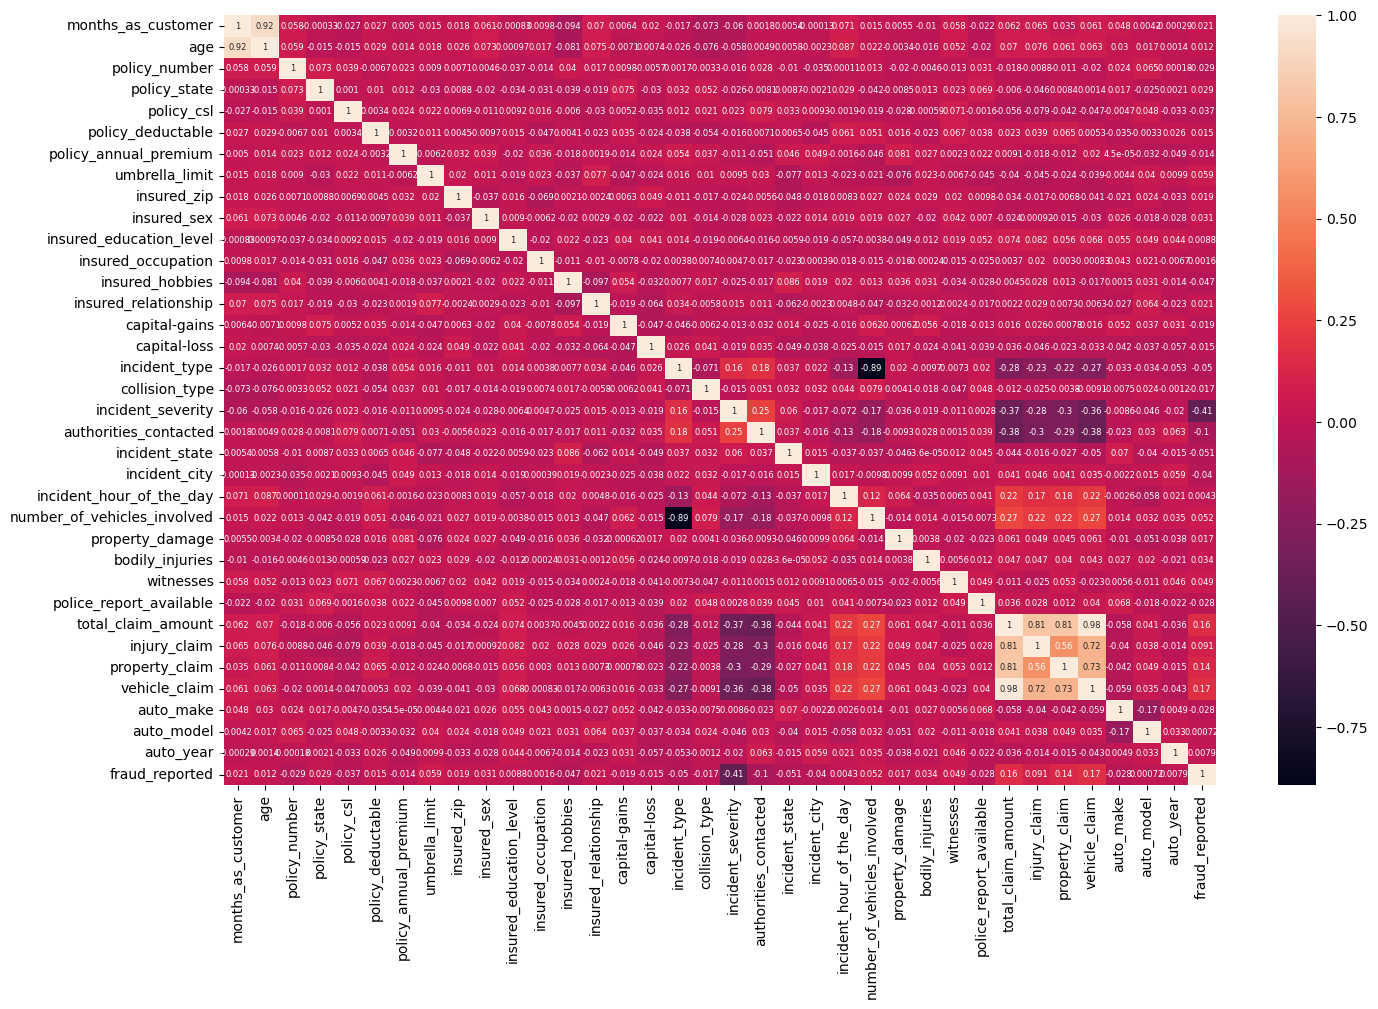

In [92]:
# Plotting Heatmap (Correlation matrix)
df_corr = df.corr() 

plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, annot_kws={'size':6})
plt.show()

In [93]:
# check skewness of dataset
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.301862
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806


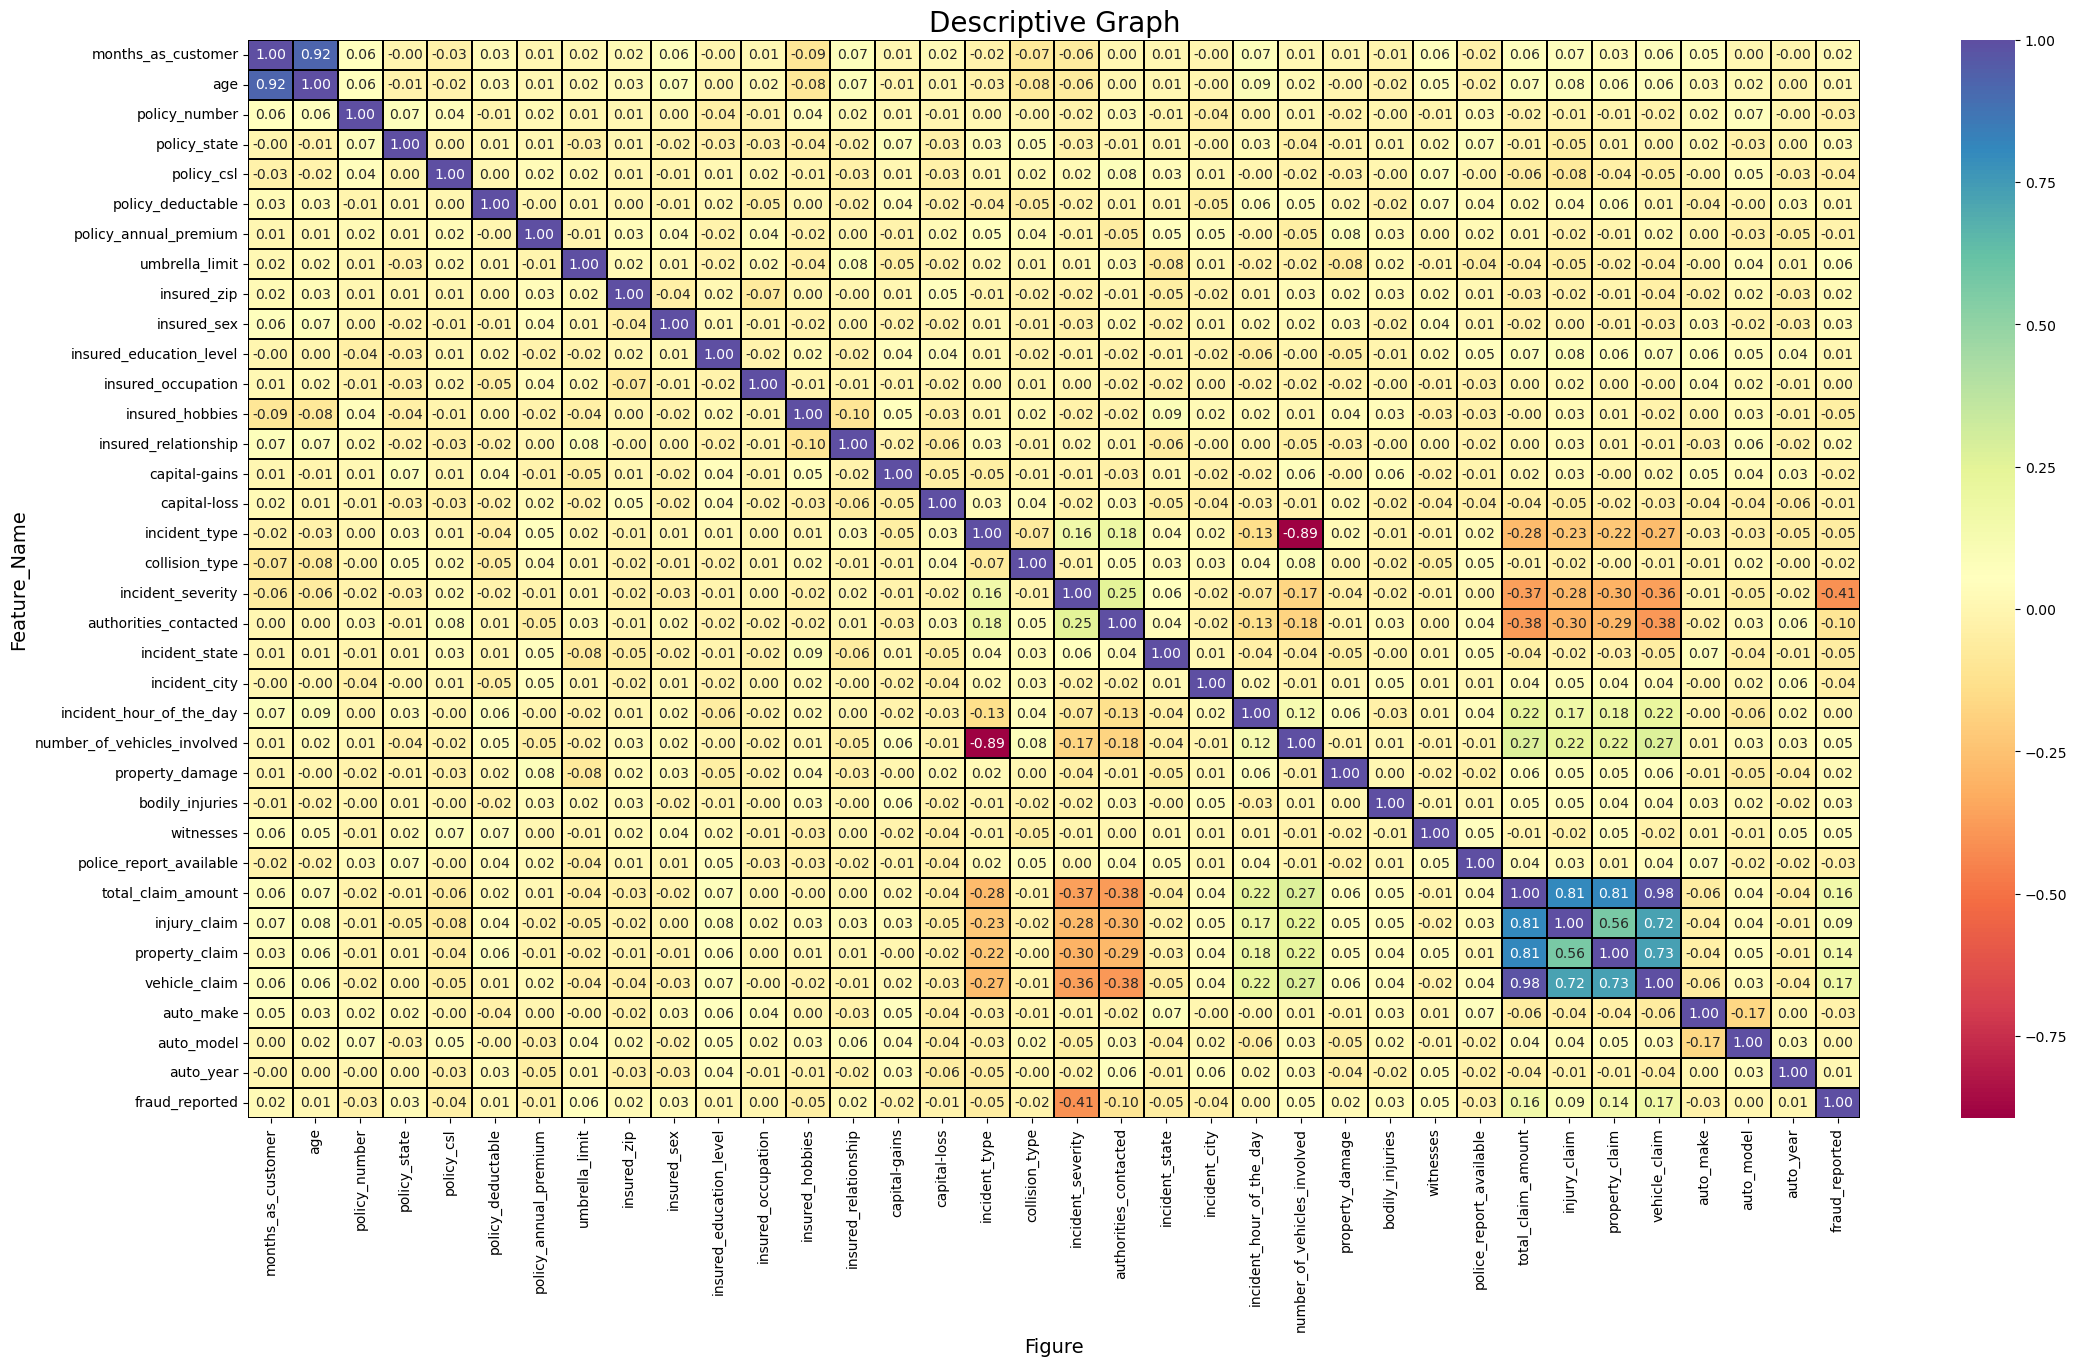

In [94]:
# Draw correlation using heatmap

plt.figure(figsize=(26,14))
sns.heatmap(df.corr(), annot=True, fmt='0.2f',linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Feature_Name', fontsize=14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()

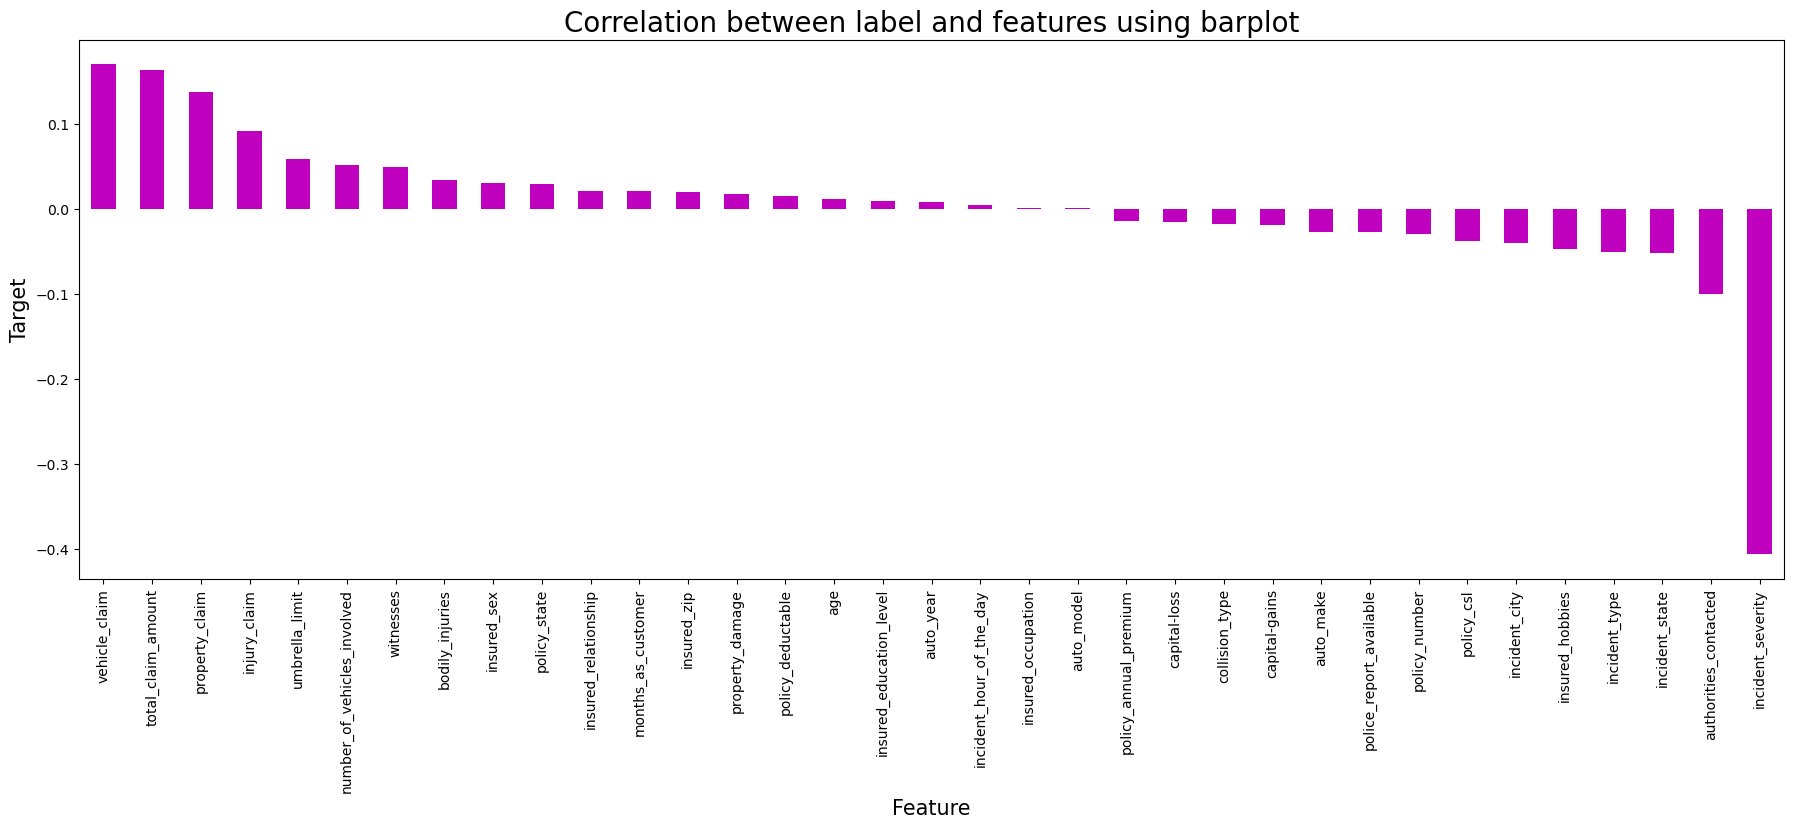

In [97]:
# correlation betweeb label and features using barplot
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar', color="m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize = 20)
plt.show()


# Seperate the features and label

In [99]:
x = df.drop("fraud_reported",axis = 1)
y = df["fraud_reported"]


In [102]:
y.value_counts()

fraud_reported
0.0    753
1.0    247
Name: count, dtype: int64

# Feature scaling using standard Scalarization

In [104]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x


,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.078140,0.990836,-0.095953,1.187173,0.060937,-0.222383,0.616705,-0.479476,-0.489529,1.076953,...,0.009759,0.461838,1.478078,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,-0.183440
1,0.208995,0.334073,-0.791527,-0.016856,0.060937,1.412784,-0.242521,1.697980,-0.461008,1.076953,...,-1.210174,-1.338700,-0.676554,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,0.315491
2,-0.608002,-1.088913,0.550566,1.187173,-1.182668,1.412784,0.642233,1.697980,-0.984885,-0.928546,...,1.229693,1.362107,-0.676554,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,0.315491
3,0.452355,0.224613,-1.239334,-1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,-0.928546,...,0.009759,0.461838,-0.676554,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,1.479664
4,0.208995,0.552994,-0.695834,-1.220886,1.304542,-0.222383,1.341980,2.133471,1.527808,1.076953,...,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.539740,1.187173,1.304542,-0.222383,0.222884,-0.479476,-0.975717,-0.928546,...,-1.210174,-0.438431,-0.676554,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,0.149180
996,0.704407,0.224613,-1.398429,-1.220886,-1.182668,-0.222383,0.739141,-0.479476,1.492519,-0.928546,...,1.229693,1.362107,-0.676554,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,1.645974
997,-0.642767,-0.541611,1.448920,1.187173,0.060937,-1.039966,0.520739,0.826998,-0.815138,-0.928546,...,1.229693,1.362107,1.478078,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,-1.513924
998,2.208028,2.523284,-0.047867,-1.220886,1.304542,1.412784,0.411866,1.697980,-0.830250,1.076953,...,-1.210174,-0.438431,1.478078,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,-1.181303


# Taking care of class imbalance

In [106]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

In [108]:
y.value_counts()

fraud_reported
1.0    753
0.0    753
Name: count, dtype: int64

In [110]:
x

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.078140,0.990836,-0.095953,1.187173,0.060937,-0.222383,0.616705,-0.479476,-0.489529,1.076953,...,0.009759,0.461838,1.478078,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,-0.183440
1,0.208995,0.334073,-0.791527,-0.016856,0.060937,1.412784,-0.242521,1.697980,-0.461008,1.076953,...,-1.210174,-1.338700,-0.676554,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,0.315491
2,-0.608002,-1.088913,0.550566,1.187173,-1.182668,1.412784,0.642233,1.697980,-0.984885,-0.928546,...,1.229693,1.362107,-0.676554,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,0.315491
3,0.452355,0.224613,-1.239334,-1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,-0.928546,...,0.009759,0.461838,-0.676554,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,1.479664
4,0.208995,0.552994,-0.695834,-1.220886,1.304542,-0.222383,1.341980,2.133471,1.527808,1.076953,...,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-0.150243,0.025284,0.337927,-1.220886,-0.889430,0.834432,1.144823,-0.479476,-0.475374,-0.928546,...,0.942036,-0.701857,-0.168498,0.744313,0.290053,-0.033025,0.973968,-0.820810,1.097018,-0.603941
1502,-0.458657,-0.852403,1.452178,0.536790,-1.182668,1.412784,0.553355,-0.479476,1.541171,-0.928546,...,0.668734,-0.510763,-0.676554,-0.133497,-0.193213,-0.213513,-0.082141,0.360539,-0.900124,-0.871707
1503,-1.201058,-1.371831,0.841788,1.160853,-1.155483,1.412784,-0.266104,2.133471,-0.308807,-0.928546,...,0.009759,-1.338700,-0.676554,0.046085,0.924007,-0.271166,-0.105104,-0.388772,-0.446361,1.631432
1504,-0.686175,-0.864561,-1.219892,-0.809587,0.060937,-1.039966,-0.343785,0.242742,-0.571406,-0.928546,...,0.009759,-0.592198,1.478078,0.386692,-0.102864,0.728319,0.381091,0.487596,0.343918,-1.087834


# Feature scaling using standard Scalarization after balance the class

In [112]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.101197,1.016935,-0.074610,1.215736,0.118121,-0.219238,0.658911,-0.504344,-0.522274,1.098317,...,0.012720,0.464744,1.549825,0.677987,-0.261368,1.156714,0.709911,0.928245,-1.728578,-0.196964
1,0.206822,0.343595,-0.795596,-0.045486,0.118121,1.471302,-0.243597,1.709085,-0.492388,1.098317,...,-1.261011,-1.439587,-0.691687,-2.108304,-1.525660,-1.542313,-2.132643,0.404622,-0.693315,0.322661
2,-0.633890,-1.115308,0.595529,1.215736,-1.178616,1.471302,0.685725,1.709085,-1.041333,-0.996083,...,1.286452,1.416909,-0.691687,-0.869673,0.001199,-0.865352,-0.986141,-0.642625,1.000752,0.322661
3,0.457247,0.231372,-1.259763,-1.306708,0.118121,1.471302,0.696915,2.151771,1.553740,-0.996083,...,0.012720,0.464744,-0.691687,0.334202,-0.298878,-0.316285,0.630317,-0.904436,1.377211,1.535119
4,0.206822,0.568042,-0.696406,-1.306708,1.414858,-0.219238,1.420720,2.151771,1.591594,1.098317,...,-1.261011,-0.487422,-0.691687,-2.048424,-1.410925,-1.570980,-2.071777,-1.689871,1.094866,0.669077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-0.162844,0.027012,0.375122,-1.306708,-0.872849,0.873365,1.213632,-0.504344,-0.507441,-0.996083,...,0.986109,-0.766033,-0.163145,0.711198,0.254597,-0.117758,0.957726,-0.842702,1.144597,-0.634905
1502,-0.480211,-0.872828,1.530080,0.534458,-1.178616,1.471302,0.592371,-0.504344,1.605596,-0.996083,...,0.700755,-0.563923,-0.691687,-0.258767,-0.265599,-0.309683,-0.209024,0.404622,-0.947507,-0.913777
1503,-1.244162,-1.405366,0.897390,1.188165,-1.150269,1.471302,-0.268367,2.151771,-0.332904,-0.996083,...,0.012720,-1.439587,-0.691687,-0.060332,0.936995,-0.370988,-0.234393,-0.386536,-0.472168,1.693181
1504,-0.714333,-0.885293,-1.239611,-0.875872,0.118121,-1.064508,-0.349961,0.229805,-0.608069,-0.996083,...,0.012720,-0.650053,1.549825,0.316033,-0.168345,0.691827,0.302737,0.538775,0.355688,-1.138867


# Import the necessory libraries

In [114]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Creating the training and testing data sets

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [122]:
# Checking accuracy for RandomForestClassifier 
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predRFC = RFC.predict(X_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8741721854304636
[[133  20]
 [ 18 131]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       153
         1.0       0.87      0.88      0.87       149

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



In [124]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predLR = LR.predict(X_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7350993377483444
[[105  48]
 [ 32 117]]
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.72       153
         1.0       0.71      0.79      0.75       149

    accuracy                           0.74       302
   macro avg       0.74      0.74      0.73       302
weighted avg       0.74      0.74      0.73       302



In [126]:
# Checking accuracy for support vector machine classifier 
svc = SVC()
svc.fit(X_train, y_train)
predsvc = svc.predict(X_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8543046357615894
[[124  29]
 [ 15 134]]
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85       153
         1.0       0.82      0.90      0.86       149

    accuracy                           0.85       302
   macro avg       0.86      0.85      0.85       302
weighted avg       0.86      0.85      0.85       302



In [128]:
# Checking accuracy for Gradient Boosting classifier 
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
predGB = GB.predict(X_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.9006622516556292
[[134  19]
 [ 11 138]]
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       153
         1.0       0.88      0.93      0.90       149

    accuracy                           0.90       302
   macro avg       0.90      0.90      0.90       302
weighted avg       0.90      0.90      0.90       302



In [130]:
# Checking accuracy for AdaBoost classifier 
ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train)
predABC = ABC.predict(X_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8708609271523179
[[134  19]
 [ 20 129]]
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       153
         1.0       0.87      0.87      0.87       149

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



In [132]:
# Checking accuracy for Bagging classifier 
BC = BaggingClassifier()
BC.fit(X_train, y_train)
predBC = BC.predict(X_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.8841059602649006
[[133  20]
 [ 15 134]]
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88       153
         1.0       0.87      0.90      0.88       149

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302



In [134]:
# Checking accuracy for Extra Tree classifier 
ET = ExtraTreesClassifier()
ET.fit(X_train, y_train)
predET = ET.predict(X_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.890728476821192
[[134  19]
 [ 14 135]]
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89       153
         1.0       0.88      0.91      0.89       149

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

# Machine Learning Model for Classification and Evaluation Metrics

In [138]:
def metric_score(clf, X_train,X_test,y_train,y_test, train = True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("\n===============Train Result =============================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False :
        pred = clf.predict(X_test)
        
        print("\n===============Test Result =============================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
                        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2)) ## model confidance/accuracy
        

 GradientBoostingClassifier is our best model 

In [140]:


GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [142]:
# Call the function and pass dataset to check train and test score 
metric_score(GB,X_train,X_test,y_train,y_test,train=True)  #This is for training score 

metric_score(GB,X_train,X_test,y_train,y_test,train=False) # This is for testing score


===============Train Result =============================
Accuracy Score: 97.06%

===============Test Result =============================
Accuracy Score: 87.39%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.89      0.84      0.87       222
         1.0       0.86      0.90      0.88       230

    accuracy                           0.87       452
   macro avg       0.88      0.87      0.87       452
weighted avg       0.88      0.87      0.87       452



# Hyper parameter tuning on the GradientBoostingClassifier Model

In [144]:
from sklearn.model_selection import GridSearchCV

In [146]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

In [148]:
gridsearch= GridSearchCV(GB, param_grid)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}

In [158]:
Final_model=GradientBoostingClassifier(learning_rate = 0.2, max_depth = 7, n_estimators = 200)
Final_model.fit(X_train,y_train)

metric_score(Final_model,X_train,X_test,y_train,y_test,train=True)  #This is for training score 

metric_score(Final_model,X_train,X_test,y_train,y_test,train=False) # This is for testing score


===============Train Result =============================
Accuracy Score: 100.00%

===============Test Result =============================
Accuracy Score: 87.83%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.91      0.84      0.87       222
         1.0       0.85      0.92      0.88       230

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452



# Save the model

In [160]:
import joblib
joblib.dump(Final_model, "Insurence_claim_fruad_detec_GB.pkl")

['Insurence_claim_fruad_detec_GB.pkl']

# predicting the saved model

In [163]:
# Let's load the saved model and get the prediction 

model = joblib.load("Insurence_claim_fruad_detec_GB.pkl")

# Prediction 

prediction = model.predict(X_test)
prediction

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0.

These are the predicted fraud_reported values for the claim.

# Actual v/s predicted 

In [165]:
a = np.array(y_test)
data = pd.DataFrame()
data["Predicted"]=prediction
data["Original"]=a
data

,Predicted,Original
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
447,1.0,1.0
448,0.0,0.0
449,0.0,0.0
450,1.0,1.0
